In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import json
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pycaret
from pycaret.regression import *
from pycaret.regression import (setup, compare_models, tune_model)

In [2]:
#reading in csvs
df = pd.read_csv(r'Users\colem\OneDrive\Documents\Springboard\COVID-19-master\covid_data_posteda.csv')
df_weekly = pd.read_csv(r'Users\colem\OneDrive\Documents\Springboard\COVID-19-master\covid_data_posteda_weekly.csv')
df_monthly = pd.read_csv(r'Users\colem\OneDrive\Documents\Springboard\COVID-19-master\covid_data_posteda_monthly.csv')

In [3]:
df.head()

,Date,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week
0,2020-04-12,58.46,0.559055,NaN,NaN,6
1,2020-04-13,68.90,1.468504,316.0,5.0,0
2,2020-04-14,64.94,0.000000,227.0,18.0,1
3,2020-04-15,50.54,0.000000,227.0,18.0,2
4,2020-04-16,52.52,0.000000,299.0,20.0,3


In [4]:
#removing null row
df = df.iloc[1:]

In [5]:
df.head()

,Date,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week
1,2020-04-13,68.90,1.468504,316.0,5.0,0
2,2020-04-14,64.94,0.000000,227.0,18.0,1
3,2020-04-15,50.54,0.000000,227.0,18.0,2
4,2020-04-16,52.52,0.000000,299.0,20.0,3
5,2020-04-17,54.50,0.000000,406.0,27.0,4


In [6]:
df.shape

(724, 6)

In [7]:
df_weekly.head()

,Date,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week
0,2020-04-19,57.688571,0.231159,290.142857,15.857143,3.0
1,2020-04-26,62.300000,0.328084,361.166667,17.500000,3.0
2,2020-05-03,62.420000,0.345332,402.857143,18.000000,3.0
3,2020-05-10,58.717143,0.063555,412.857143,17.142857,3.0
4,2020-05-17,64.348571,0.002812,521.714286,17.857143,3.0


In [8]:
df_weekly.shape

(103, 6)

In [9]:
#dropping day of week for weekly
df_weekly = df_weekly.drop(columns = 'Day_Of_Week')

In [10]:
df_monthly.head()

,Date,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week
0,2020-05-31,65.503226,0.212979,568.193548,17.645161,3.193548
1,2020-06-30,75.968000,0.093832,1198.066667,14.266667,2.833333
2,2020-07-31,82.010968,0.106299,1832.129032,18.225806,3.000000
3,2020-08-31,79.746452,0.132461,1470.806452,24.838710,3.064516
4,2020-09-30,71.378000,0.148556,1433.633333,26.733333,2.900000


In [11]:
df_monthly.shape

(23, 6)

In [12]:
#dropping day of week for monthly
df_monthly = df_monthly.drop(columns = 'Day_Of_Week')

In [13]:
#setting index to date and making sure order is correct
df.set_index('Date', drop = True, append = False, inplace = True, verify_integrity = False)
df.sort_values(by = "Date", inplace=True)
df.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week
Date,,,,,
2020-04-13,68.90,1.468504,316.0,5.0,0
2020-04-14,64.94,0.000000,227.0,18.0,1
2020-04-15,50.54,0.000000,227.0,18.0,2
2020-04-16,52.52,0.000000,299.0,20.0,3
2020-04-17,54.50,0.000000,406.0,27.0,4


In [14]:
#setting index to date and making sure order is correct
df_weekly.set_index('Date', drop = True, append = False, inplace = True, verify_integrity = False)
df_weekly.sort_values(by = "Date", inplace=True)
df_weekly.head()

,T_avg,Prcp,New_Confirmed,New_Deaths
Date,,,,
2020-04-19,57.688571,0.231159,290.142857,15.857143
2020-04-26,62.300000,0.328084,361.166667,17.500000
2020-05-03,62.420000,0.345332,402.857143,18.000000
2020-05-10,58.717143,0.063555,412.857143,17.142857
2020-05-17,64.348571,0.002812,521.714286,17.857143


In [15]:
#setting index to date and making sure order is correct
df_monthly.set_index('Date', drop = True, append = False, inplace = True, verify_integrity = False)
df_monthly.sort_values(by = "Date", inplace=True)
df_monthly.head()

,T_avg,Prcp,New_Confirmed,New_Deaths
Date,,,,
2020-05-31,65.503226,0.212979,568.193548,17.645161
2020-06-30,75.968000,0.093832,1198.066667,14.266667
2020-07-31,82.010968,0.106299,1832.129032,18.225806
2020-08-31,79.746452,0.132461,1470.806452,24.838710
2020-09-30,71.378000,0.148556,1433.633333,26.733333


In [16]:
#creating lags for confirmed cases and deaths
con_lag_df = df.copy()
for i in range(24):
    if i != 0:
        con_lag_df['New_Confirmed_Lag '+ str(i)] = con_lag_df['New_Confirmed'].shift(-i)
dth_lag_df = df.copy()
for i in range(24):
    if i != 0:
        dth_lag_df['New_Deaths_Lag '+ str(i)] = dth_lag_df['New_Deaths'].shift(-i)

In [17]:
con_lag_df.head(7)

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Confirmed_Lag 1,New_Confirmed_Lag 2,New_Confirmed_Lag 3,New_Confirmed_Lag 4,New_Confirmed_Lag 5,New_Confirmed_Lag 6,New_Confirmed_Lag 7,New_Confirmed_Lag 8,New_Confirmed_Lag 9,New_Confirmed_Lag 10,New_Confirmed_Lag 11,New_Confirmed_Lag 12,New_Confirmed_Lag 13,New_Confirmed_Lag 14,New_Confirmed_Lag 15,New_Confirmed_Lag 16,New_Confirmed_Lag 17,New_Confirmed_Lag 18,New_Confirmed_Lag 19,New_Confirmed_Lag 20,New_Confirmed_Lag 21,New_Confirmed_Lag 22,New_Confirmed_Lag 23
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-13,68.90,1.468504,316.0,5.0,0,227.0,227.0,299.0,406.0,283.0,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0
2020-04-14,64.94,0.000000,227.0,18.0,1,227.0,299.0,406.0,283.0,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0
2020-04-15,50.54,0.000000,227.0,18.0,2,299.0,406.0,283.0,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0,466.0
2020-04-16,52.52,0.000000,299.0,20.0,3,406.0,283.0,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0,466.0,472.0
2020-04-17,54.50,0.000000,406.0,27.0,4,283.0,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0,466.0,472.0,460.0
2020-04-18,60.44,0.098425,283.0,10.0,5,273.0,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0,466.0,472.0,460.0,336.0
2020-04-19,51.98,0.051181,273.0,13.0,6,294.0,239.0,361.0,325.0,470.0,478.0,229.0,324.0,434.0,425.0,574.0,316.0,518.0,182.0,201.0,539.0,543.0,487.0,466.0,472.0,460.0,336.0,348.0


In [18]:
dth_lag_df.head(7)

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Deaths_Lag 1,New_Deaths_Lag 2,New_Deaths_Lag 3,New_Deaths_Lag 4,New_Deaths_Lag 5,New_Deaths_Lag 6,New_Deaths_Lag 7,New_Deaths_Lag 8,New_Deaths_Lag 9,New_Deaths_Lag 10,New_Deaths_Lag 11,New_Deaths_Lag 12,New_Deaths_Lag 13,New_Deaths_Lag 14,New_Deaths_Lag 15,New_Deaths_Lag 16,New_Deaths_Lag 17,New_Deaths_Lag 18,New_Deaths_Lag 19,New_Deaths_Lag 20,New_Deaths_Lag 21,New_Deaths_Lag 22,New_Deaths_Lag 23
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-13,68.90,1.468504,316.0,5.0,0,18.0,18.0,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0
2020-04-14,64.94,0.000000,227.0,18.0,1,18.0,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0
2020-04-15,50.54,0.000000,227.0,18.0,2,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0
2020-04-16,52.52,0.000000,299.0,20.0,3,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0
2020-04-17,54.50,0.000000,406.0,27.0,4,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0
2020-04-18,60.44,0.098425,283.0,10.0,5,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0
2020-04-19,51.98,0.051181,273.0,13.0,6,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0,25.0


In [19]:
#showing correlation for confirmed lags, doesn't look likek there is much correlation
corr_df_con = con_lag_df.corr()
corr_df_con

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Confirmed_Lag 1,New_Confirmed_Lag 2,New_Confirmed_Lag 3,New_Confirmed_Lag 4,New_Confirmed_Lag 5,New_Confirmed_Lag 6,New_Confirmed_Lag 7,New_Confirmed_Lag 8,New_Confirmed_Lag 9,New_Confirmed_Lag 10,New_Confirmed_Lag 11,New_Confirmed_Lag 12,New_Confirmed_Lag 13,New_Confirmed_Lag 14,New_Confirmed_Lag 15,New_Confirmed_Lag 16,New_Confirmed_Lag 17,New_Confirmed_Lag 18,New_Confirmed_Lag 19,New_Confirmed_Lag 20,New_Confirmed_Lag 21,New_Confirmed_Lag 22,New_Confirmed_Lag 23
T_avg,1.000000,0.011588,-0.407289,-0.342514,0.005120,-0.399685,-0.395761,-0.393634,-0.385091,-0.371632,-0.369797,-0.357849,-0.341757,-0.335358,-0.337370,-0.331908,-0.308373,-0.295572,-0.288384,-0.274035,-0.268712,-0.272518,-0.270359,-0.258679,-0.244003,-0.233864,-0.229518,-0.230198
Prcp,0.011588,1.000000,0.002968,-0.002933,-0.014344,0.010981,-0.007395,0.013776,-0.003355,0.013010,0.023738,0.016896,0.014305,0.016837,-0.008620,0.014352,0.029162,0.021549,0.009906,0.007924,-0.002899,-0.012940,-0.012321,0.010081,0.004231,-0.008697,-0.002348,-0.013621
New_Confirmed,-0.407289,0.002968,1.000000,0.371082,0.066465,0.934342,0.891295,0.888136,0.875910,0.863284,0.873795,0.878777,0.836946,0.779798,0.759102,0.729366,0.694395,0.699589,0.690968,0.632701,0.576768,0.546396,0.515402,0.479965,0.465340,0.454664,0.408147,0.356025
New_Deaths,-0.342514,-0.002933,0.371082,1.000000,0.200477,0.346793,0.292563,0.235009,0.200915,0.179147,0.193245,0.240656,0.235210,0.185683,0.142503,0.103743,0.085753,0.102793,0.146533,0.136289,0.098695,0.054293,0.025398,0.011810,0.014415,0.058160,0.063548,0.020041
Day_Of_Week,0.005120,-0.014344,0.066465,0.200477,1.000000,0.051597,0.013457,-0.083717,-0.086503,-0.012758,0.064145,0.066785,0.051856,0.013623,-0.084247,-0.086921,-0.012993,0.064590,0.067007,0.052037,0.013858,-0.084707,-0.087549,-0.013118,0.064956,0.067545,0.052454,0.013908
New_Confirmed_Lag 1,-0.399685,0.010981,0.934342,0.346793,0.051597,1.000000,0.934303,0.891230,0.888070,0.875840,0.863202,0.873719,0.878705,0.836847,0.779669,0.758958,0.729211,0.694220,0.699404,0.690782,0.632486,0.576519,0.546141,0.515105,0.479665,0.464998,0.454316,0.407804
New_Confirmed_Lag 2,-0.395761,-0.007395,0.891295,0.292563,0.013457,0.934303,1.000000,0.934262,0.891165,0.888005,0.875764,0.863118,0.873642,0.878629,0.836749,0.779534,0.758818,0.729053,0.694026,0.699217,0.690596,0.632264,0.576275,0.545856,0.514819,0.479323,0.464647,0.453993
New_Confirmed_Lag 3,-0.393634,0.013776,0.888136,0.235009,-0.083717,0.891230,0.934262,1.000000,0.934223,0.891102,0.887937,0.875688,0.863035,0.873563,0.878556,0.836649,0.779406,0.758677,0.728881,0.693836,0.699037,0.690410,0.632053,0.576009,0.545588,0.514500,0.478981,0.464330
New_Confirmed_Lag 4,-0.385091,-0.003355,0.875910,0.200915,-0.086503,0.888070,0.891165,0.934223,1.000000,0.934185,0.891037,0.887869,0.875613,0.862951,0.873489,0.878483,0.836556,0.779279,0.758527,0.728716,0.693656,0.698859,0.690235,0.631826,0.575763,0.545295,0.514188,0.478678
New_Confirmed_Lag 5,-0.371632,0.013010,0.863284,0.179147,-0.012758,0.875840,0.888005,0.891102,0.934185,1.000000,0.934147,0.890973,0.887805,0.875540,0.862872,0.873415,0.878416,0.836465,0.779147,0.758385,0.728561,0.693480,0.698694,0.690051,0.631619,0.575499,0.545013,0.513914


In [20]:
#showing correlation for death lags, looks like we have some bumps in correlation on 7,14,21
corr_df_dth = dth_lag_df.corr()
corr_df_dth

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Deaths_Lag 1,New_Deaths_Lag 2,New_Deaths_Lag 3,New_Deaths_Lag 4,New_Deaths_Lag 5,New_Deaths_Lag 6,New_Deaths_Lag 7,New_Deaths_Lag 8,New_Deaths_Lag 9,New_Deaths_Lag 10,New_Deaths_Lag 11,New_Deaths_Lag 12,New_Deaths_Lag 13,New_Deaths_Lag 14,New_Deaths_Lag 15,New_Deaths_Lag 16,New_Deaths_Lag 17,New_Deaths_Lag 18,New_Deaths_Lag 19,New_Deaths_Lag 20,New_Deaths_Lag 21,New_Deaths_Lag 22,New_Deaths_Lag 23
T_avg,1.000000,0.011588,-0.407289,-0.342514,0.005120,-0.338433,-0.334087,-0.332630,-0.340810,-0.341987,-0.332476,-0.313683,-0.312562,-0.314483,-0.319072,-0.333536,-0.327561,-0.308908,-0.303934,-0.302308,-0.305390,-0.304572,-0.304502,-0.297978,-0.275697,-0.267766,-0.269068,-0.271443
Prcp,0.011588,1.000000,0.002968,-0.002933,-0.014344,0.000294,-0.026160,0.030752,-0.000171,-0.020794,0.020122,0.022608,0.010258,-0.012234,0.024797,0.006221,-0.027885,0.012848,0.026038,-0.001095,-0.015522,-0.010519,-0.015930,-0.004559,-0.008534,0.027599,0.020284,-0.016970
New_Confirmed,-0.407289,0.002968,1.000000,0.371082,0.066465,0.292401,0.270187,0.287504,0.326110,0.380630,0.428417,0.438904,0.383386,0.349378,0.361759,0.399733,0.455306,0.512012,0.496977,0.429505,0.407699,0.413022,0.448738,0.499843,0.531119,0.519789,0.443496,0.411071
New_Deaths,-0.342514,-0.002933,0.371082,1.000000,0.200477,0.644661,0.449906,0.330785,0.312423,0.443836,0.631786,0.795524,0.604636,0.387875,0.272046,0.305367,0.392104,0.582416,0.737892,0.523954,0.337198,0.236535,0.232210,0.336448,0.503493,0.601085,0.449464,0.242720
Day_Of_Week,0.005120,-0.014344,0.066465,0.200477,1.000000,-0.013128,-0.277957,-0.338614,-0.011548,0.164692,0.286216,0.201795,-0.013024,-0.278982,-0.340658,-0.010275,0.165094,0.288104,0.201817,-0.013346,-0.278741,-0.343143,-0.011193,0.165350,0.290982,0.203803,-0.012509,-0.279546
New_Deaths_Lag 1,-0.338433,0.000294,0.292401,0.644661,-0.013128,1.000000,0.644533,0.449635,0.330497,0.312393,0.443314,0.631514,0.795507,0.604783,0.387621,0.271559,0.304800,0.391551,0.582267,0.737779,0.523898,0.336864,0.236324,0.231567,0.335864,0.502848,0.600658,0.449631
New_Deaths_Lag 2,-0.334087,-0.026160,0.270187,0.449906,-0.277957,0.644533,1.000000,0.644422,0.449487,0.330442,0.312066,0.443083,0.631396,0.795536,0.604676,0.387396,0.271242,0.304471,0.391364,0.582111,0.737738,0.523752,0.336746,0.235984,0.231207,0.335464,0.502601,0.600706
New_Deaths_Lag 3,-0.332630,0.030752,0.287504,0.330785,-0.338614,0.449635,0.644422,1.000000,0.644328,0.449454,0.330126,0.311776,0.442904,0.631394,0.795482,0.604531,0.387133,0.270896,0.304258,0.391136,0.582034,0.737658,0.523675,0.336454,0.235627,0.230717,0.335108,0.502631
New_Deaths_Lag 4,-0.340810,-0.000171,0.326110,0.312423,-0.011548,0.330497,0.449487,0.644328,1.000000,0.644319,0.449255,0.329891,0.311588,0.442866,0.631306,0.795426,0.604404,0.386900,0.270705,0.304036,0.391025,0.581922,0.737624,0.523510,0.336198,0.235226,0.230362,0.335102
New_Deaths_Lag 5,-0.341987,-0.020794,0.380630,0.443836,0.164692,0.312393,0.330442,0.449454,0.644319,1.000000,0.644402,0.449238,0.329834,0.311558,0.442826,0.631316,0.795515,0.604453,0.386849,0.270627,0.303982,0.390973,0.581895,0.737691,0.523515,0.336176,0.235125,0.230346


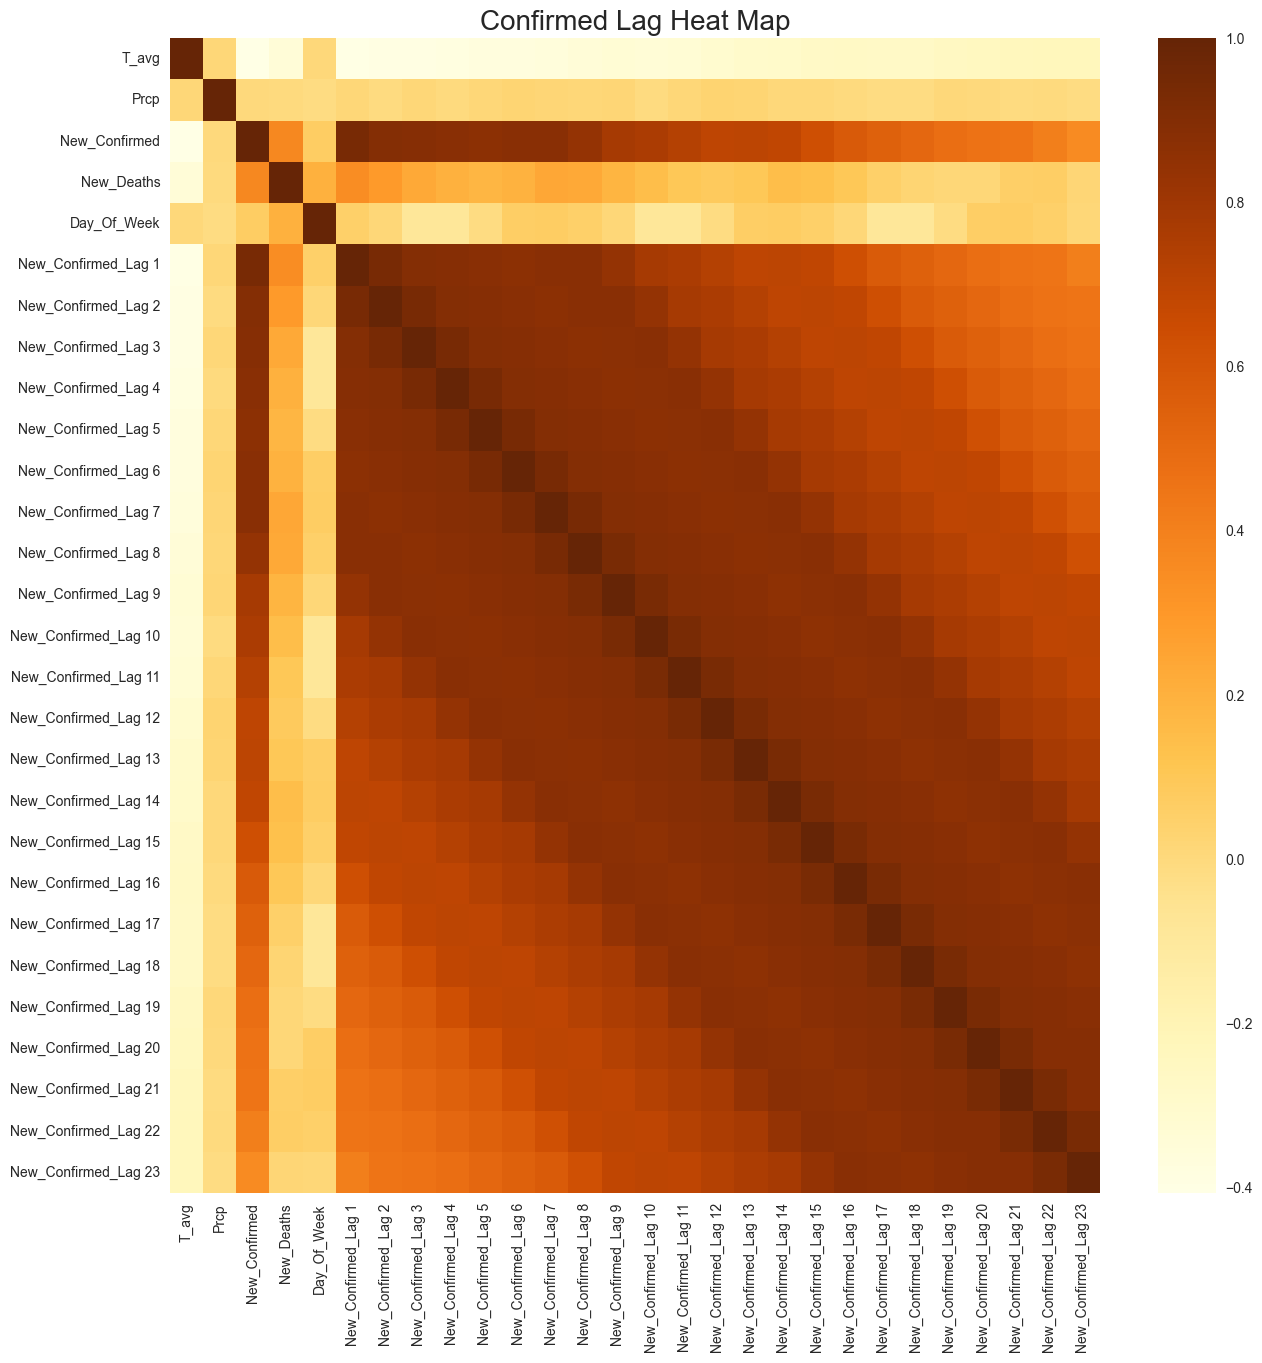

In [21]:
#heatmap for confirmed lag correlation
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data=con_lag_df.corr(), cmap = 'YlOrBr')
ax.set_title("Confirmed Lag Heat Map", fontsize = 20)
plt.show()

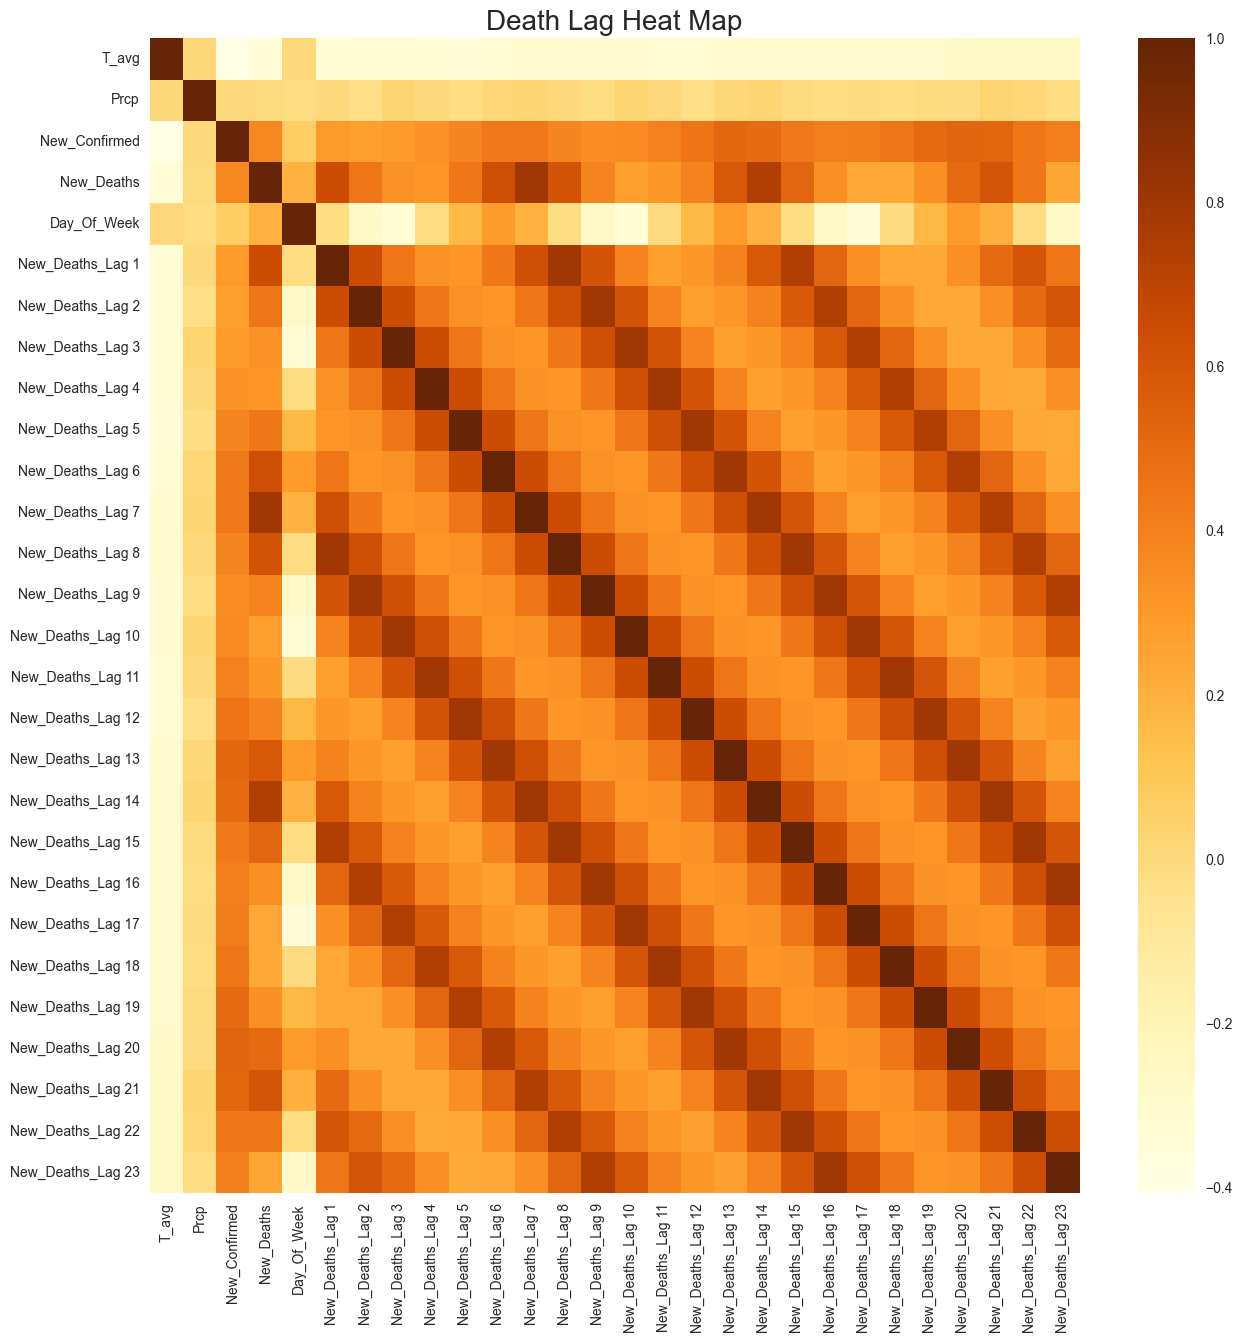

In [22]:
#heatmap for death lag correlation
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data=dth_lag_df.corr(), cmap = 'YlOrBr')
ax.set_title("Death Lag Heat Map", fontsize = 20)
plt.show()

In [23]:
#Looks like the 7 day and 14 day new deaths have the highest correlation with new confirmed. Adding only 7th, 14th and 21st death lag to main df.
df['New_Deaths_Lag_7_day'] = dth_lag_df['New_Deaths_Lag 7']
df['New_Deaths_Lag_14_day'] = dth_lag_df['New_Deaths_Lag 14']
df['New_Deaths_Lag21_day'] = dth_lag_df['New_Deaths_Lag 21']

In [24]:
dth_lag_df.head(21)

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Deaths_Lag 1,New_Deaths_Lag 2,New_Deaths_Lag 3,New_Deaths_Lag 4,New_Deaths_Lag 5,New_Deaths_Lag 6,New_Deaths_Lag 7,New_Deaths_Lag 8,New_Deaths_Lag 9,New_Deaths_Lag 10,New_Deaths_Lag 11,New_Deaths_Lag 12,New_Deaths_Lag 13,New_Deaths_Lag 14,New_Deaths_Lag 15,New_Deaths_Lag 16,New_Deaths_Lag 17,New_Deaths_Lag 18,New_Deaths_Lag 19,New_Deaths_Lag 20,New_Deaths_Lag 21,New_Deaths_Lag 22,New_Deaths_Lag 23
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-13,68.90,1.468504,316.0,5.0,0,18.0,18.0,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0
2020-04-14,64.94,0.000000,227.0,18.0,1,18.0,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0
2020-04-15,50.54,0.000000,227.0,18.0,2,20.0,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0
2020-04-16,52.52,0.000000,299.0,20.0,3,27.0,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0
2020-04-17,54.50,0.000000,406.0,27.0,4,10.0,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0
2020-04-18,60.44,0.098425,283.0,10.0,5,13.0,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0
2020-04-19,51.98,0.051181,273.0,13.0,6,18.0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0,25.0
2020-04-20,59.36,1.059055,294.0,18.0,0,27.0,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0,25.0,25.0
2020-04-21,62.96,0.000000,239.0,27.0,1,20.0,16.0,13.0,11.0,19.0,16.0,23.0,19.0,24.0,13.0,12.0,3.0,8.0,30.0,20.0,21.0,17.0,21.0,13.0,11.0,25.0,25.0,16.0


In [25]:
#adding in death lags into the weekly df
df_weekly['New_Deaths_Lag_1_week']= dth_lag_df['New_Deaths_Lag 1']+dth_lag_df['New_Deaths_Lag 2']+dth_lag_df['New_Deaths_Lag 3']+dth_lag_df['New_Deaths_Lag 4']+dth_lag_df['New_Deaths_Lag 5']+dth_lag_df['New_Deaths_Lag 6']+dth_lag_df['New_Deaths_Lag 7']
df_weekly['New_Deaths_Lag_2_week']= dth_lag_df['New_Deaths_Lag 8']+dth_lag_df['New_Deaths_Lag 9']+dth_lag_df['New_Deaths_Lag 10']+dth_lag_df['New_Deaths_Lag 11']+dth_lag_df['New_Deaths_Lag 12']+dth_lag_df['New_Deaths_Lag 13']+dth_lag_df['New_Deaths_Lag 14']
df_weekly['New_Deaths_Lag_3_week']= dth_lag_df['New_Deaths_Lag 15']+dth_lag_df['New_Deaths_Lag 16']+dth_lag_df['New_Deaths_Lag 17']+dth_lag_df['New_Deaths_Lag 18']+dth_lag_df['New_Deaths_Lag 19']+dth_lag_df['New_Deaths_Lag 20']+dth_lag_df['New_Deaths_Lag 21']

In [26]:
#adding in confirmed lags into the weekly df
df_weekly['New_Confirmed_Lag_1_week']= con_lag_df['New_Confirmed_Lag 1']+con_lag_df['New_Confirmed_Lag 2']+con_lag_df['New_Confirmed_Lag 3']+con_lag_df['New_Confirmed_Lag 4']+con_lag_df['New_Confirmed_Lag 5']+con_lag_df['New_Confirmed_Lag 6']+con_lag_df['New_Confirmed_Lag 7']
df_weekly['New_Confirmed_Lag_2_week']= con_lag_df['New_Confirmed_Lag 8']+con_lag_df['New_Confirmed_Lag 9']+con_lag_df['New_Confirmed_Lag 10']+con_lag_df['New_Confirmed_Lag 11']+con_lag_df['New_Confirmed_Lag 12']+con_lag_df['New_Confirmed_Lag 13']+con_lag_df['New_Confirmed_Lag 14']
df_weekly['New_Confirmed_Lag_3_week']= con_lag_df['New_Confirmed_Lag 15']+con_lag_df['New_Confirmed_Lag 16']+con_lag_df['New_Confirmed_Lag 17']+con_lag_df['New_Confirmed_Lag 18']+con_lag_df['New_Confirmed_Lag 19']+con_lag_df['New_Confirmed_Lag 20']+con_lag_df['New_Confirmed_Lag 21']

In [27]:
df_weekly.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,New_Deaths_Lag_1_week,New_Deaths_Lag_2_week,New_Deaths_Lag_3_week,New_Confirmed_Lag_1_week,New_Confirmed_Lag_2_week,New_Confirmed_Lag_3_week
Date,,,,,,,,,,
2020-04-19,57.688571,0.231159,290.142857,15.857143,124.0,110.0,130.0,2396.0,2773.0,3168.0
2020-04-26,62.300000,0.328084,361.166667,17.500000,126.0,120.0,125.0,2820.0,2890.0,3652.0
2020-05-03,62.420000,0.345332,402.857143,18.000000,120.0,125.0,102.0,2890.0,3652.0,4734.0
2020-05-10,58.717143,0.063555,412.857143,17.142857,125.0,102.0,151.0,3652.0,4734.0,4930.0
2020-05-17,64.348571,0.002812,521.714286,17.857143,102.0,151.0,99.0,4734.0,4930.0,6924.0


In [28]:
df_weekly.tail()

,T_avg,Prcp,New_Confirmed,New_Deaths,New_Deaths_Lag_1_week,New_Deaths_Lag_2_week,New_Deaths_Lag_3_week,New_Confirmed_Lag_1_week,New_Confirmed_Lag_2_week,New_Confirmed_Lag_3_week
Date,,,,,,,,,,
2022-03-06,63.377143,0.000000,1997.476190,36.095238,159.000000,129.666667,114.666667,10222.333333,8053.666667,7368.666667
2022-03-13,51.414286,0.556805,1460.333333,22.714286,129.666667,114.666667,42.666667,8053.666667,7368.666667,6121.000000
2022-03-20,57.842857,0.121485,1150.523810,18.523810,114.666667,42.666667,NaN,7368.666667,6121.000000,NaN
2022-03-27,57.354286,0.029809,1052.666667,16.380952,42.666667,NaN,NaN,6121.000000,NaN,NaN
2022-04-03,57.174286,0.155793,874.428571,6.095238,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Deaths_Lag_7_day,New_Deaths_Lag_14_day,New_Deaths_Lag21_day
Date,,,,,,,,
2020-04-13,68.90,1.468504,316.0,5.0,0,18.0,16.0,8.0
2020-04-14,64.94,0.000000,227.0,18.0,1,27.0,23.0,30.0
2020-04-15,50.54,0.000000,227.0,18.0,2,20.0,19.0,20.0
2020-04-16,52.52,0.000000,299.0,20.0,3,16.0,24.0,21.0
2020-04-17,54.50,0.000000,406.0,27.0,4,13.0,13.0,17.0


In [30]:
#making sure data is prepped for models, no nulls, no date index
df = df.fillna(0)
df = df.iloc[21:]
df.reset_index(drop = True, inplace = True)

In [31]:
#US Census Bureau has North Carolina population at 10.5 million
df['New_Cases_as_percent_of_pop'] = df['New_Confirmed']/10.5

In [32]:
df.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,Day_Of_Week,New_Deaths_Lag_7_day,New_Deaths_Lag_14_day,New_Deaths_Lag21_day,New_Cases_as_percent_of_pop
0,64.94,0.228346,201.0,8.0,1,11.0,7.0,6.0,19.142857
1,57.92,0.118110,539.0,30.0,2,25.0,0.0,11.0,51.333333
2,52.34,0.000000,543.0,20.0,3,25.0,33.0,43.0,51.714286
3,53.42,0.098425,487.0,21.0,4,16.0,2.0,32.0,46.380952
4,51.98,0.000000,466.0,17.0,5,26.0,47.0,43.0,44.380952


In [33]:
#making sure data is prepped for models, no nulls, no date index
df_weekly = df_weekly.fillna(0)
df_weekly = df_weekly.iloc[3:]
df_weekly = df_weekly.iloc[:-3]
df_weekly.reset_index(drop = True, inplace = True)

In [34]:
#US Census Bureau has North Carolina population at 10.5 million
df_weekly['New_Cases_as_percent_of_pop'] = df_weekly['New_Confirmed']/10.5

In [35]:
df_weekly.shape

(97, 11)

In [36]:
df_weekly.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,New_Deaths_Lag_1_week,New_Deaths_Lag_2_week,New_Deaths_Lag_3_week,New_Confirmed_Lag_1_week,New_Confirmed_Lag_2_week,New_Confirmed_Lag_3_week,New_Cases_as_percent_of_pop
0,58.717143,0.063555,412.857143,17.142857,125.0,102.0,151.0,3652.0,4734.0,4930.0,39.319728
1,64.348571,0.002812,521.714286,17.857143,102.0,151.0,99.0,4734.0,4930.0,6924.0,49.687075
2,67.460000,0.574803,676.285714,14.571429,151.0,99.0,99.0,4930.0,6924.0,8127.0,64.408163
3,72.885714,0.302025,704.285714,21.571429,99.0,99.0,88.0,6924.0,8127.0,8545.0,67.074830
4,76.562857,0.045557,989.142857,14.142857,99.0,88.0,138.0,8127.0,8545.0,9422.0,94.204082


In [37]:
#doing a quick check on correlations for df weekly
df_weekly.corr()

,T_avg,Prcp,New_Confirmed,New_Deaths,New_Deaths_Lag_1_week,New_Deaths_Lag_2_week,New_Deaths_Lag_3_week,New_Confirmed_Lag_1_week,New_Confirmed_Lag_2_week,New_Confirmed_Lag_3_week,New_Cases_as_percent_of_pop
T_avg,1.000000,-0.039270,-0.486729,-0.526894,-0.501120,-0.475124,-0.416378,-0.428733,-0.348397,-0.289071,-0.486729
Prcp,-0.039270,1.000000,0.028525,0.011236,0.020617,0.002890,0.044010,0.062508,0.052709,0.015530,0.028525
New_Confirmed,-0.486729,0.028525,1.000000,0.411431,0.530426,0.623583,0.656810,0.914455,0.715648,0.472485,1.000000
New_Deaths,-0.526894,0.011236,0.411431,1.000000,0.915451,0.815441,0.660330,0.270208,0.140341,0.027777,0.411431
New_Deaths_Lag_1_week,-0.501120,0.020617,0.530426,0.915451,1.000000,0.915412,0.814569,0.410543,0.269351,0.139756,0.530426
New_Deaths_Lag_2_week,-0.475124,0.002890,0.623583,0.815441,0.915412,1.000000,0.914812,0.529969,0.410238,0.269411,0.623583
New_Deaths_Lag_3_week,-0.416378,0.044010,0.656810,0.660330,0.814569,0.914812,1.000000,0.622479,0.529461,0.410686,0.656810
New_Confirmed_Lag_1_week,-0.428733,0.062508,0.914455,0.270208,0.410543,0.529969,0.622479,1.000000,0.914316,0.715305,0.914455
New_Confirmed_Lag_2_week,-0.348397,0.052709,0.715648,0.140341,0.269351,0.410238,0.529461,0.914316,1.000000,0.914234,0.715648
New_Confirmed_Lag_3_week,-0.289071,0.015530,0.472485,0.027777,0.139756,0.269411,0.410686,0.715305,0.914234,1.000000,0.472485


In [38]:
#creating features for daily
X_daily = df.drop(['New_Cases_as_percent_of_pop','New_Confirmed'], axis=1)
y_daily = df['New_Cases_as_percent_of_pop']

In [39]:
#creating features for weekly
X_weekly = df_weekly.drop(['New_Cases_as_percent_of_pop','New_Confirmed'], axis=1)
y_weekly = df_weekly['New_Cases_as_percent_of_pop']

In [41]:
#creating features for monthly
X_monthly = df_monthly.drop(['New_Confirmed'], axis=1)
y_monthly = df_monthly['New_Confirmed']

Using the mean as a baseline prediction model

In [42]:
#making test and training split
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily,y_daily, test_size = .25, random_state = 23)
dummy_mean_daily = DummyRegressor(strategy = 'mean')
#Training dummy regressor
dummy_mean_daily.fit(X_train_daily, y_train_daily)
#Getting R-squared score
score_mean_daily = dummy_mean_daily.score(X_test_daily, y_test_daily)
print('The R2 score when using the mean to predict daily NC COVID19 confirmed cases is:', score_mean_daily)

The R2 score when using the mean to predict daily NC COVID19 confirmed cases is: -0.09251243376248719


In [43]:
#making test and training split
X_train_weekly, X_test_weekly, y_train_weekly, y_test_weekly = train_test_split(X_weekly,y_weekly, test_size = .25, random_state = 23)
dummy_mean_weekly = DummyRegressor(strategy = 'mean')
#Training dummy regressor
dummy_mean_weekly.fit(X_train_weekly, y_train_weekly)
#Getting R-squared score
score_mean_weekly = dummy_mean_weekly.score(X_test_weekly, y_test_weekly)
print('The R2 score when using the mean to predict weekly NC COVID19 confirmed cases is:', score_mean_weekly)

The R2 score when using the mean to predict weekly NC COVID19 confirmed cases is: -0.011908257621119356


In [44]:
#making test and training split
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly,y_monthly, test_size = .25, random_state = 23)
dummy_mean_monthly = DummyRegressor(strategy = 'mean')
#Training dummy regressor
dummy_mean_monthly.fit(X_train_monthly, y_train_monthly)
#Getting R-squared score
score_mean_monthly = dummy_mean_monthly.score(X_test_monthly, y_test_monthly)
print('The R2 score when using the mean to predict monthly NC COVID19 confirmed cases is:', score_mean_monthly)

The R2 score when using the mean to predict monthly NC COVID19 confirmed cases is: -1.129758778963652


Determining optimal models with pycaret

In [45]:
#Determining optimal models with pycaret
df_weekly.dtypes

T_avg                          float64
Prcp                           float64
New_Confirmed                  float64
New_Deaths                     float64
New_Deaths_Lag_1_week          float64
New_Deaths_Lag_2_week          float64
New_Deaths_Lag_3_week          float64
New_Confirmed_Lag_1_week       float64
New_Confirmed_Lag_2_week       float64
New_Confirmed_Lag_3_week       float64
New_Cases_as_percent_of_pop    float64
dtype: object

In [46]:
df_weekly.head()

,T_avg,Prcp,New_Confirmed,New_Deaths,New_Deaths_Lag_1_week,New_Deaths_Lag_2_week,New_Deaths_Lag_3_week,New_Confirmed_Lag_1_week,New_Confirmed_Lag_2_week,New_Confirmed_Lag_3_week,New_Cases_as_percent_of_pop
0,58.717143,0.063555,412.857143,17.142857,125.0,102.0,151.0,3652.0,4734.0,4930.0,39.319728
1,64.348571,0.002812,521.714286,17.857143,102.0,151.0,99.0,4734.0,4930.0,6924.0,49.687075
2,67.460000,0.574803,676.285714,14.571429,151.0,99.0,99.0,4930.0,6924.0,8127.0,64.408163
3,72.885714,0.302025,704.285714,21.571429,99.0,99.0,88.0,6924.0,8127.0,8545.0,67.074830
4,76.562857,0.045557,989.142857,14.142857,99.0,88.0,138.0,8127.0,8545.0,9422.0,94.204082


In [50]:
#Decided to use the weekly df for all model building
# Setup the dataset
#grid = setup(data = df_weekly, target = 'New_Confirmed', normalize = True, numeric_features = ['T_avg', 'Prcp', 'New_Deaths', 'New_Deaths_Lag_1_week', 'New_Deaths_Lag_2_week', 'New_Deaths_Lag_3_week']) #dependent variable is last column
grid = setup(data = df_weekly, target = 'New_Cases_as_percent_of_pop', train_size = .8, fold = 5, normalize = False, ignore_features = ['New_Confirmed'], numeric_features = ['T_avg', 'Prcp', 'New_Deaths', 'New_Deaths_Lag_1_week', 'New_Deaths_Lag_2_week', 'New_Deaths_Lag_3_week', 'New_Confirmed_Lag_1_week', 'New_Confirmed_Lag_2_week', 'New_Confirmed_Lag_3_week'], silent = True, session_id = 123)

# Evaluate models and compare models
best = compare_models()

# Report the best model
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,77.0383,25288.4817,137.1853,0.8874,0.3811,0.2333,0.0080
huber,Huber Regressor,102.9366,61339.2002,197.8633,0.7550,0.2959,0.2516,0.0160
llar,Lasso Least Angle Regression,79.8730,26148.5220,152.9376,0.7295,0.5616,0.2835,0.0080
br,Bayesian Ridge,95.2108,44351.1690,177.2491,0.7145,0.2915,0.2969,0.0080
en,Elastic Net,110.3915,62217.6683,204.3716,0.6454,0.3858,0.3284,0.0120
lasso,Lasso Regression,110.3346,62396.0684,204.8332,0.6405,0.4046,0.3245,0.0080
ridge,Ridge Regression,110.7984,62705.5608,205.0940,0.6400,0.4145,0.3258,0.0080
lr,Linear Regression,111.9583,63111.1118,205.8245,0.6343,0.4709,0.3317,0.0060
catboost,CatBoost Regressor,118.0607,98358.1055,261.3549,0.5764,0.3528,0.2760,0.3040
rf,Random Forest Regressor,112.3261,70862.0160,240.4216,0.4752,0.3241,0.2772,0.0440


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=123, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [48]:
R2 scores are a bit low, will be building out multiple models and then ensembling them in next notebook

In [49]:
df_weekly.to_csv(r'Users\colem\OneDrive\Documents\Springboard\COVID-19-master/covid_data_postprocessing_weekly.csv', index = False)